In [49]:
!pip install mibian

  Created wheel for mibian: filename=mibian-0.1.3-py3-none-any.whl size=4039 sha256=817f616bf1448effae3675c1139f109a341fad3532228cff4cfaddbb0024d7ef
  Stored in directory: c:\users\tabit\appdata\local\pip\cache\wheels\bb\8e\88\9401e806f2eaf5d2f4e775e598c27d7cc09bfb06998d075093
Successfully built mibian


In [87]:
import numpy as np 
import pandas as pd
import seaborn as sns   
import mibian
import time
import datetime
from matplotlib import pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
    
from sklearn.svm import SVC 

# Train/Test Preparation

In [51]:
def process_data(df, symbol, sector):
    # Let's take a look at appl calls and puts
    symbol_df = df[df.Sector==symbol] if sector else df[df.Symbol==symbol] 
    symbol_df.columns = symbol_df.columns.str.strip()

    symbol_df = symbol_df.replace({'In the Money': {'True':1, 'False':0}})
    symbol_df = symbol_df.replace({'In the Money': {True:1, False:0}})
    symbol_df = symbol_df.replace({'Call': {True:1,False:0}})

    # columns to drop for our input feature vector
    columns = ['Symbol','Expiration Date', 'Sector', 'Industry', 'Record Time', 'Profit']
    symbol_df = symbol_df.drop(columns=columns)

    return symbol_df

In [52]:
# Scraped yahoo data
options_data_3_11_df = pd.read_csv('../yahooData/results/finalData_3-11.csv', delimiter=',')
options_data_3_18_df = pd.read_csv('../yahooData/results/finalData_3-18.csv', delimiter=',')
options_data_3_25_df = pd.read_csv('../yahooData/results/finalData_3-25.csv', delimiter=',')
options_data_4_01_df = pd.read_csv('../yahooData/results/finalData_4-01.csv', delimiter=',')
options_data_4_08_df = pd.read_csv('../yahooData/results/finalData_4-08.csv', delimiter=',')
options_data_4_15_df = pd.read_csv('../yahooData/results/finalData_4-15.csv', delimiter=',')
options_data_4_22_df = pd.read_csv('../yahooData/results/finalData_4-22.csv', delimiter=',')

options_data_3_11_df = process_data(options_data_3_11_df, 'Technology', True)
options_data_3_18_df = process_data(options_data_3_18_df, 'Technology', True)
options_data_3_25_df = process_data(options_data_3_25_df, 'Technology', True)
options_data_4_01_df = process_data(options_data_4_01_df, 'Technology', True)
options_data_4_08_df = process_data(options_data_4_08_df, 'Technology', True)
options_data_4_15_df = process_data(options_data_4_15_df, 'Technology', True)
options_data_4_22_df = process_data(options_data_4_22_df, 'Technology', True)

train_df = pd.concat([options_data_3_11_df, options_data_3_18_df, options_data_3_25_df, options_data_4_01_df, options_data_4_08_df, options_data_4_15_df])

calls_df = train_df.loc[train_df['Call'] == 1]
options7call_df = options_data_4_22_df.loc[options_data_4_22_df['Call'] == 1]

puts_df = train_df.loc[train_df['Call'] == 0]
options7put_df = options_data_4_22_df.loc[options_data_4_22_df['Call'] == 0]

D:\Program_Files\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [76]:
def run_log_reg_model(features, train_df, test_df):
    X_train = train_df
    y_train = np.ravel(X_train[['Success']])
    X_train = X_train[features]
    print(X_train.columns)

    # feature scaling
    scaler = StandardScaler()
    scaler.fit(X_train)

    # scaled data
    X_train_scaled = scaler.transform(X_train)

    # scale the 3-18 data based on the stats from 3-11 data
    # sample ~1000 data points for 80/20 split
    X_test = test_df.sample(frac=0.1)
    y_test = np.ravel(X_test[['Success']])
    X_test = X_test[features]
    print(X_test.columns)
    
    X_test_scaled = scaler.transform(X_test)

    # # 80/20 train/test split
    # X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)
    
    log_reg_model = LogisticRegression()
    log_reg_model.fit(X_train_scaled, y_train)
    y = log_reg_model.predict(X_test_scaled)
    score = log_reg_model.score(X_test_scaled, y_test)
    print(log_reg_model.coef_)
    print(score)

In [77]:
run_log_reg_model(['Implied Volatility', 'Volume', 'Days to Expire', 'Needed Percent Change'], calls_df, options7call_df)
run_log_reg_model(['Needed Percent Change', 'Volume'], calls_df, options7call_df)
run_log_reg_model(['Implied Volatility'], calls_df, options7call_df)

Index(['Implied Volatility', 'Volume', 'Days to Expire',
       'Needed Percent Change'],
      dtype='object')
Index(['Implied Volatility', 'Volume', 'Days to Expire',
       'Needed Percent Change'],
      dtype='object')
[[ 0.07547605  0.01194369  0.07557428 -6.19119817]]
0.9845679012345679
Index(['Needed Percent Change', 'Volume'], dtype='object')
Index(['Needed Percent Change', 'Volume'], dtype='object')
[[-6.09571653e+00  5.22547087e-03]]
0.9783950617283951
Index(['Implied Volatility'], dtype='object')
Index(['Implied Volatility'], dtype='object')
[[-0.89147097]]
0.9660493827160493


In [78]:
run_log_reg_model(['Implied Volatility', 'Volume', 'Days to Expire', 'Needed Percent Change'], puts_df, options7put_df)
run_log_reg_model(['Needed Percent Change', 'Volume'], puts_df, options7put_df)
run_log_reg_model(['Implied Volatility'], puts_df, options7put_df)

Index(['Implied Volatility', 'Volume', 'Days to Expire',
       'Needed Percent Change'],
      dtype='object')
Index(['Implied Volatility', 'Volume', 'Days to Expire',
       'Needed Percent Change'],
      dtype='object')
[[-0.94278431  0.00877688 -0.02781751  1.75301834]]
0.6613418530351438
Index(['Needed Percent Change', 'Volume'], dtype='object')
Index(['Needed Percent Change', 'Volume'], dtype='object')
[[1.76776193 0.03792488]]
0.7028753993610224
Index(['Implied Volatility'], dtype='object')
Index(['Implied Volatility'], dtype='object')
[[-1.18080673]]
0.5942492012779552


# With Black Scholes

In [64]:
def callDelta(row):
    daysToExpire = row['Days to Expire'] if row['Days to Expire'] > 0 else 1/2
    c = mibian.BS([row['Current Price'], row['Strike'], 0, daysToExpire], volatility = (row['Implied Volatility'] * 100))
    return c.callDelta

def callTheta(row):
    daysToExpire = row['Days to Expire'] if row['Days to Expire'] > 0 else 1/2
    c = mibian.BS([row['Current Price'], row['Strike'], 0, daysToExpire], volatility = (row['Implied Volatility'] * 100))
    return c.callTheta

def callRho(row):
    daysToExpire = row['Days to Expire'] if row['Days to Expire'] > 0 else 1/2
    c = mibian.BS([row['Current Price'], row['Strike'], 0, daysToExpire], volatility = (row['Implied Volatility'] * 100))
    return c.callRho

def callVega(row):
    daysToExpire = row['Days to Expire'] if row['Days to Expire'] > 0 else 1/2
    c = mibian.BS([row['Current Price'], row['Strike'], 0, daysToExpire], volatility = (row['Implied Volatility'] * 100))
    return c.vega

def callGamma(row):
    daysToExpire = row['Days to Expire'] if row['Days to Expire'] > 0 else 1/2
    c = mibian.BS([row['Current Price'], row['Strike'], 0, daysToExpire], volatility = (row['Implied Volatility'] * 100))
    return c.gamma

def putDelta(row):
    daysToExpire = row['Days to Expire'] if row['Days to Expire'] > 0 else 1/2
    c = mibian.BS([row['Current Price'], row['Strike'], 0, daysToExpire], volatility = (row['Implied Volatility'] * 100))
    return c.putDelta

def putTheta(row):
    daysToExpire = row['Days to Expire'] if row['Days to Expire'] > 0 else 1/2
    c = mibian.BS([row['Current Price'], row['Strike'], 0, daysToExpire], volatility = (row['Implied Volatility'] * 100))
    return c.putTheta

def putRho(row):
    daysToExpire = row['Days to Expire'] if row['Days to Expire'] > 0 else 1/2
    c = mibian.BS([row['Current Price'], row['Strike'], 0, daysToExpire], volatility = (row['Implied Volatility'] * 100))
    return c.putRho

def putVega(row):
    daysToExpire = row['Days to Expire'] if row['Days to Expire'] > 0 else 1/2
    c = mibian.BS([row['Current Price'], row['Strike'], 0, daysToExpire], volatility = (row['Implied Volatility'] * 100))
    return c.vega

def putGamma(row):
    daysToExpire = row['Days to Expire'] if row['Days to Expire'] > 0 else 1/2
    c = mibian.BS([row['Current Price'], row['Strike'], 0, daysToExpire], volatility = (row['Implied Volatility'] * 100))
    return c.gamma

In [65]:
start_time = time.time()

calls_df['Delta'] = calls_df.apply(lambda row: callDelta(row), axis=1)
calls_df['Theta'] = calls_df.apply(lambda row: callTheta(row), axis=1)
calls_df['Rho'] = calls_df.apply(lambda row: callRho(row), axis=1)
calls_df['Vega'] = calls_df.apply(lambda row: callVega(row), axis=1)
calls_df['Gamma'] = calls_df.apply(lambda row: callGamma(row), axis=1)

options7call_df['Delta'] = options7call_df.apply(lambda row: callDelta(row), axis=1)
options7call_df['Theta'] = options7call_df.apply(lambda row: callTheta(row), axis=1)
options7call_df['Rho'] = options7call_df.apply(lambda row: callRho(row), axis=1)
options7call_df['Vega'] = options7call_df.apply(lambda row: callVega(row), axis=1)
options7call_df['Gamma'] = options7call_df.apply(lambda row: callGamma(row), axis=1)

puts_df['Delta'] = puts_df.apply(lambda row: putDelta(row), axis=1)
puts_df['Theta'] = puts_df.apply(lambda row: putTheta(row), axis=1)
puts_df['Rho'] = puts_df.apply(lambda row: putRho(row), axis=1)
puts_df['Vega'] = puts_df.apply(lambda row: putVega(row), axis=1)
puts_df['Gamma'] = puts_df.apply(lambda row: putGamma(row), axis=1)

options7put_df['Delta'] = options7put_df.apply(lambda row: putDelta(row), axis=1)
options7put_df['Theta'] = options7put_df.apply(lambda row: putTheta(row), axis=1)
options7put_df['Rho'] = options7put_df.apply(lambda row: putRho(row), axis=1)
options7put_df['Vega'] = options7put_df.apply(lambda row: putVega(row), axis=1)
options7put_df['Gamma'] = options7put_df.apply(lambda row: putGamma(row), axis=1)

print(f"Took {datetime.timedelta(seconds=(time.time() - start_time))} seconds")

<ipython-input-65-8edb69237694>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_df['Delta'] = calls_df.apply(lambda row: callDelta(row), axis=1)
<ipython-input-65-8edb69237694>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls_df['Theta'] = calls_df.apply(lambda row: callTheta(row), axis=1)
<ipython-input-65-8edb69237694>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

Took 0:09:29.495284 seconds


<ipython-input-65-8edb69237694>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  options7put_df['Gamma'] = options7put_df.apply(lambda row: putGamma(row), axis=1)


In [79]:
print(calls_df)

        Strike  Current Price  Implied Volatility  Volume In the Money  Call  \
0        130.0       160.5300            1.414065    72.0            1     1   
1        135.0       160.5300            0.000010    78.0            1     1   
2        138.0       160.5300            0.824221    32.0            1     1   
3        139.0       160.5300            1.066411    20.0            1     1   
4        140.0       160.5300            0.859376   199.0            1     1   
...        ...            ...                 ...     ...          ...   ...   
149978   820.0       461.0808            0.500005    20.0            0     1   
150308   105.0       100.4500            0.500005    16.0            0     1   
150362   105.0       103.2250            0.236336    51.0            0     1   
150363   160.0       103.2250            3.390627    32.0            0     1   
150364   165.0       103.2250            3.593751   245.0            0     1   

          Mark  Days to Expire  Breakev

In [85]:
run_log_reg_model(['Implied Volatility', 'Volume', 'Days to Expire', 'Needed Percent Change', 'Delta', 'Theta', 'Rho', 'Vega', 'Gamma'], calls_df, options7call_df)
run_log_reg_model(['Needed Percent Change', 'Volume', 'Delta', 'Theta', 'Rho', 'Vega', 'Gamma'], calls_df, options7call_df)
run_log_reg_model(['Implied Volatility', 'Delta', 'Theta', 'Rho', 'Vega', 'Gamma'], calls_df, options7call_df)

Index(['Implied Volatility', 'Volume', 'Days to Expire',
       'Needed Percent Change', 'Delta', 'Theta', 'Rho', 'Vega', 'Gamma'],
      dtype='object')
Index(['Implied Volatility', 'Volume', 'Days to Expire',
       'Needed Percent Change', 'Delta', 'Theta', 'Rho', 'Vega', 'Gamma'],
      dtype='object')
[[-0.16163431  0.05934822  0.04544109 -4.10763466  0.6287101   0.24274768
  -0.27537074  0.32419573 -0.18293876]]
0.9753086419753086
Index(['Needed Percent Change', 'Volume', 'Delta', 'Theta', 'Rho', 'Vega',
       'Gamma'],
      dtype='object')
Index(['Needed Percent Change', 'Volume', 'Delta', 'Theta', 'Rho', 'Vega',
       'Gamma'],
      dtype='object')
[[-4.26159756  0.05846235  0.58777061  0.38497128 -0.2541444   0.34046874
  -0.16898195]]
0.9753086419753086
Index(['Implied Volatility', 'Delta', 'Theta', 'Rho', 'Vega', 'Gamma'], dtype='object')
Index(['Implied Volatility', 'Delta', 'Theta', 'Rho', 'Vega', 'Gamma'], dtype='object')
[[-0.85369586  1.36296337  0.0550136  -0.25252

In [83]:
run_log_reg_model(['Implied Volatility', 'Volume', 'Days to Expire', 'Needed Percent Change', 'Delta', 'Theta', 'Rho', 'Vega', 'Gamma'], puts_df, options7put_df)
run_log_reg_model(['Needed Percent Change', 'Volume','Delta', 'Theta', 'Rho', 'Vega', 'Gamma'], puts_df, options7put_df)
run_log_reg_model(['Implied Volatility', 'Delta', 'Theta', 'Rho', 'Vega', 'Gamma'], puts_df, options7put_df)

Index(['Implied Volatility', 'Volume', 'Days to Expire',
       'Needed Percent Change', 'Delta', 'Theta', 'Rho', 'Vega', 'Gamma'],
      dtype='object')
Index(['Implied Volatility', 'Volume', 'Days to Expire',
       'Needed Percent Change', 'Delta', 'Theta', 'Rho', 'Vega', 'Gamma'],
      dtype='object')
[[-0.63807234  0.03960993  0.0787112   0.54513151 -1.12306652 -0.1537373
   0.16948259  0.18277957  0.1621281 ]]
0.8594249201277955
Index(['Needed Percent Change', 'Volume', 'Delta', 'Theta', 'Rho', 'Vega',
       'Gamma'],
      dtype='object')
Index(['Needed Percent Change', 'Volume', 'Delta', 'Theta', 'Rho', 'Vega',
       'Gamma'],
      dtype='object')
[[ 0.28510297  0.06394475 -1.3089038   0.05602812  0.03646005  0.23443351
   0.2453514 ]]
0.8466453674121406
Index(['Implied Volatility', 'Delta', 'Theta', 'Rho', 'Vega', 'Gamma'], dtype='object')
Index(['Implied Volatility', 'Delta', 'Theta', 'Rho', 'Vega', 'Gamma'], dtype='object')
[[-0.50433294 -1.42684971 -0.12782683  0.039724

<AxesSubplot:>

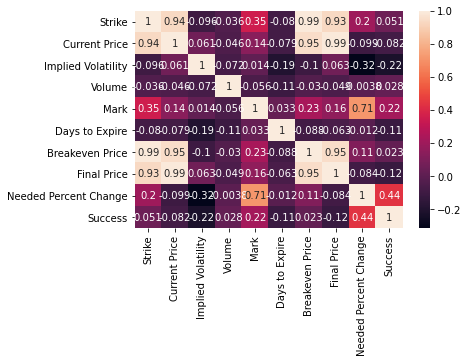

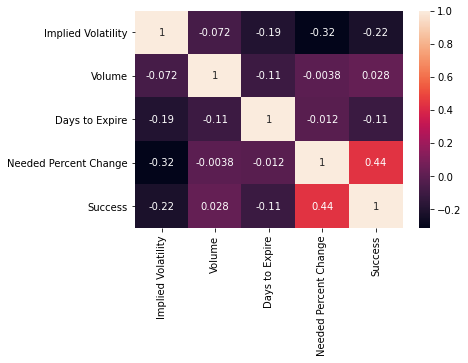

In [69]:
sns.heatmap(pd.concat([options_data_3_11_df, options_data_3_18_df, options_data_3_25_df, options_data_4_01_df, options_data_4_08_df]).corr(),annot= True)
plt.figure()
sns.heatmap(pd.concat([options_data_3_11_df, options_data_3_18_df, options_data_3_25_df, options_data_4_01_df, options_data_4_08_df])[['Implied Volatility', 'Volume', 'Days to Expire', 'Needed Percent Change','Success']].corr(),annot= True)